# Group Assignment 2: Census Data Exploration
Ben Bressette

Our group project is a comparison of accessibility and mobility in Los Angeles neighborhoods. We seek to grasp how different neighborhoods and demographic compositions experience daily life in their own neighborhood and the broader city. We will be using data from the American Community Survey, LA Metro, the City of LA, LA Times, and the Bureau of Transportation Statistics.

My partner, Andrew Williams, looked at a variety of data that explores the means of transportation to work at the census tract level. I will analyze race, income, and density at the same level across the City of LA. 

## Preparing data libraries

In [3]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

This step is directly from the class lab, and will allow us to properly analyze and visualize our data.

## Load Census data
I will load three Census data tables:
    1. Table B02001: Race
    2. Table B07010: Geographical Mobility in the Past Year by Individual Income in the Past 12 Months for Current 
    Residence in the United States (2019 dollars, adjusted for inflation)
    3. Means of Transportation to Work by Language Spoken at Home and Ability to Speak English

In [5]:
# loading the three data files

gdf_race = gpd.read_file('data/acs2019_5yr_B02001_race.geojson')
gdf_transportlang = gpd.read_file('data/acs2019_5yr_B08113_transportlanguage.geojson')
gdf_geogmobility = gpd.read_file('data/acs2019_5yr_B07010_geographicmobility.geojson')

## Begin to look at the data
Since there are three different datasets, we will need to run commands for each one. 

In [7]:
gdf_race.shape

(1005, 23)

In [8]:
gdf_transportlang.shape

(1005, 115)

In [9]:
gdf_geogmobility.shape

(1005, 135)

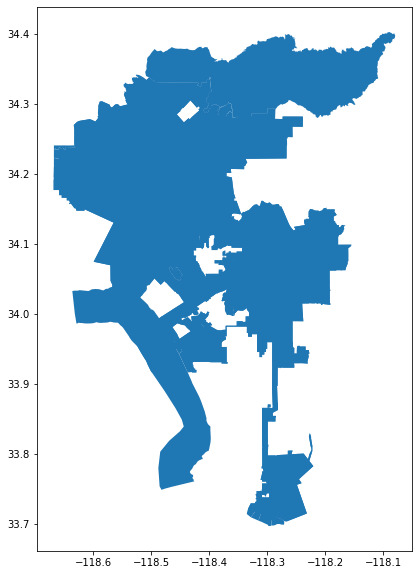

In [11]:
gdf_race.plot(figsize=(10,10))

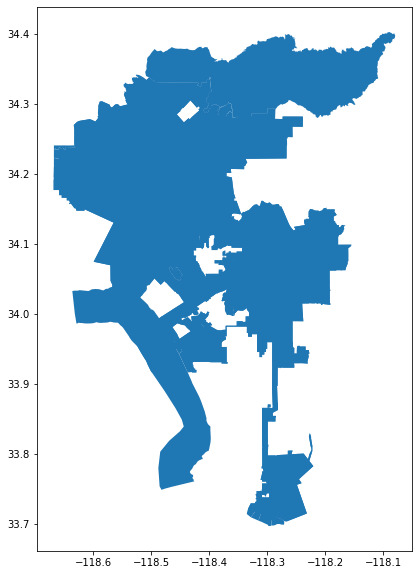

In [12]:
gdf_transportlang.plot(figsize=(10,10))

In [14]:
gdf_geogmobility

geoid                                   name  B07010001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3541.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2988.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     5065.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3093.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA     3488.0   
...                  ...                                    ...        ...   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA       26.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA     1150.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
1004      16000US0644000                        Los Angeles, CA  3281455.0   

      B07010001, Error  B07010002  B07010002, Error  B07010003  \
0                374.0      699.0             218.0     2842.0   
1                241.0      448.0             153.0     2540.0   
2                445.0      728.0             297.0     4337.0   
3                236.0      437.0             115.0     2656.0   
4                362.0      482.0             164.0     3006.0   
...                ...        ...               ...        ...   
1000              18.0       12.0              12.0       14.0   
1001              12.0        0.0              12.0        0.0   
1002             170.0      714.0             206.0      436.0   
1003              12.0        0.0              12.0        0.0   
1004            3713.0   541638.0            4529.0  2739817.0   

      B07010003, Error  B07010004  B07010004, Error  ...  B07010062, Error  \
0                270.0      413.0             128.0  ...              12.0   
1                167.0      342.0              99.0  ...              12.0   
2                418.0     1089.0             295.0  ...              17.0   
3                232.0      676.0             174.0  ...              12.0   
4                289.0      429.0             159.0  ...              12.0   
...                ...        ...               ...  ...               ...   
1000              17.0        5.0               7.0  ...              12.0   
1001              12.0        0.0              12.0  ...              12.0   
1002             174.0      233.0              86.0  ...              12.0   
1003              12.0        0.0              12.0  ...              12.0   
1004            5577.0   455176.0            5542.0  ...             303.0   

      B07010063  B07010063, Error  B07010064  B07010064, Error  B07010065  \
0           0.0              12.0        0.0              12.0        0.0   
1           0.0              12.0        0.0              12.0        0.0   
2           0.0              17.0        0.0              17.0        0.0   
3           0.0              12.0        0.0              12.0        0.0   
4           0.0              12.0        0.0              12.0        0.0   
...         ...               ...        ...               ...        ...   
1000        0.0              12.0        0.0              12.0        0.0   
1001        0.0              12.0        0.0              12.0        0.0   
1002        0.0              12.0        0.0              12.0        0.0   
1003        0.0              12.0        0.0              12.0        0.0   
1004     1389.0             285.0      995.0             234.0      401.0   

      B07010065, Error  B07010066  B07010066, Error  \
0                 12.0        0.0              12.0   
1                 12.0        0.0              12.0   
2                 17.0        0.0              17.0   
3                 12.0        0.0              12.0   
4                 12.0        0.0              12.0   
...                ...        ...               ...   
1000              12.0        0.0         

## What does this tell us? 
Not a lot -- so far. The maps produced for the race and language are the same, and the data table for geographic mobility is just what we saw when we downloaded the data from the Census. This is ok though -- not all data is going to be conclusive on its own, and we will need to combine sets, tables, and variables to reach meaningful relationships.

In [15]:
gdf_race.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

In [16]:
gdf_transportlang.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

Again, this doesn't tell us much. It's just the geographic IDs of the observations in the Census, which are the same. 

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
gdf_race.sample()

geoid                                name  B02001001  \
899  14000US06037272100  Census Tract 2721, Los Angeles, CA     4578.0   

     B02001001, Error  B02001002  B02001002, Error  B02001003  \
899             422.0     3403.0             388.0       42.0   

     B02001003, Error  B02001004  B02001004, Error  B02001005  \
899              34.0      226.0             272.0      258.0   

     B02001005, Error  B02001006  B02001006, Error  B02001007  \
899             119.0       19.0              22.0      262.0   

     B02001007, Error  B02001008  B02001008, Error  B02001009  \
899             204.0      368.0             180.0      125.0   

     B02001009, Error  B02001010  B02001010, Error  \
899             146.0      243.0             116.0   

                                              geometry  
899  MULTIPOLYGON (((-118.45107 34.00341, -118.4502...

In [19]:
gdf_race.info

<bound method DataFrame.info of                    geoid                                   name  B02001001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     4283.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3702.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA     3884.0   
5     14000US06037101400     Census Tract 1014, Los Angeles, CA     3458.0   
6     14000US06037102103  Census Tract 1021.03, Los Angeles, CA     1763.0   
7     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     3721.0   
8     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1905.0   
9     14000US06037102107  Census Tract 1021.07, Los Angeles, CA     4349.0   
10    14000US06037103101  Census Tract 1031.01, Los Angeles, CA     2428.0   
11    14000US06037103102  Census

In [20]:
gdf_transportlang.info

<bound method DataFrame.info of                    geoid                                   name  B08113001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     2027.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1834.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     3057.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1593.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA     1782.0   
5     14000US06037101400     Census Tract 1014, Los Angeles, CA     1553.0   
6     14000US06037102103  Census Tract 1021.03, Los Angeles, CA      831.0   
7     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     1640.0   
8     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1053.0   
9     14000US06037102107  Census Tract 1021.07, Los Angeles, CA     1929.0   
10    14000US06037103101  Census Tract 1031.01, Los Angeles, CA     1208.0   
11    14000US06037103102  Census

In [21]:
gdf_geogmobility.info

<bound method DataFrame.info of                    geoid                                   name  B07010001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3541.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2988.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     5065.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3093.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA     3488.0   
5     14000US06037101400     Census Tract 1014, Los Angeles, CA     3039.0   
6     14000US06037102103  Census Tract 1021.03, Los Angeles, CA     1540.0   
7     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     3232.0   
8     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1690.0   
9     14000US06037102107  Census Tract 1021.07, Los Angeles, CA     3786.0   
10    14000US06037103101  Census Tract 1031.01, Los Angeles, CA     2035.0   
11    14000US06037103102  Census

In [22]:
list(gdf_geogmobility)

['geoid',
 'name',
 'B07010001',
 'B07010001, Error',
 'B07010002',
 'B07010002, Error',
 'B07010003',
 'B07010003, Error',
 'B07010004',
 'B07010004, Error',
 'B07010005',
 'B07010005, Error',
 'B07010006',
 'B07010006, Error',
 'B07010007',
 'B07010007, Error',
 'B07010008',
 'B07010008, Error',
 'B07010009',
 'B07010009, Error',
 'B07010010',
 'B07010010, Error',
 'B07010011',
 'B07010011, Error',
 'B07010012',
 'B07010012, Error',
 'B07010013',
 'B07010013, Error',
 'B07010014',
 'B07010014, Error',
 'B07010015',
 'B07010015, Error',
 'B07010016',
 'B07010016, Error',
 'B07010017',
 'B07010017, Error',
 'B07010018',
 'B07010018, Error',
 'B07010019',
 'B07010019, Error',
 'B07010020',
 'B07010020, Error',
 'B07010021',
 'B07010021, Error',
 'B07010022',
 'B07010022, Error',
 'B07010023',
 'B07010023, Error',
 'B07010024',
 'B07010024, Error',
 'B07010025',
 'B07010025, Error',
 'B07010026',
 'B07010026, Error',
 'B07010027',
 'B07010027, Error',
 'B07010028',
 'B07010028, Error',
 